In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
raw_data = pd.read_csv('train.csv')

In [3]:
raw_data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [15]:
raw_data.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [23]:
#get the unique values of each columns
for i in raw_data.columns:
    #print(i)
    print(f'{i} have {raw_data[i].nunique()} unique values.')


ACTION have 2 unique values.
RESOURCE have 7518 unique values.
MGR_ID have 4243 unique values.
ROLE_ROLLUP_1 have 128 unique values.
ROLE_ROLLUP_2 have 177 unique values.
ROLE_DEPTNAME have 449 unique values.
ROLE_TITLE have 343 unique values.
ROLE_FAMILY_DESC have 2358 unique values.
ROLE_FAMILY have 67 unique values.
ROLE_CODE have 343 unique values.


In [24]:
#check for correlation
raw_data.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


<AxesSubplot:>

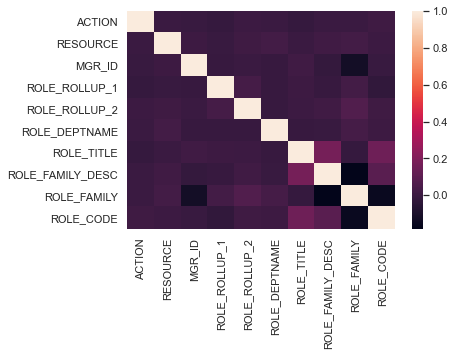

In [26]:
#plot the correlation
sns.heatmap(raw_data.corr())

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


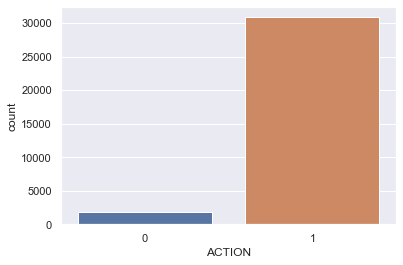

In [33]:
#plot the distribution of the target variable
sns.countplot(raw_data['ACTION'])
plt.show()

We can see that the target column is highly biased.

In [49]:
#Perform train test split.
from sklearn.model_selection import train_test_split

target = raw_data.ACTION
features = raw_data.drop('ACTION',axis=1)
features.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [52]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=10)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
#Predict the accuary using LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

#get the accuracy score
accu = accuracy_score(y_pred, y_test) *100
print(f'The Logistic Regression Accuracy Score is: {accu:.2f}% .')

print(f'The Logistic Regression Confusion Matrix is:')
confusion_matrix(y_pred,y_test)

The Logistic Regression Accuracy Score is: 94.06% .
The Logistic Regression Confusion Matrix is:


array([[   0,    0],
       [ 389, 6165]])

In [83]:
#Predict the accuracy using Random Forest Classifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accu_rfc = accuracy_score(y_pred, y_test) * 100
print(f'The Random Forest Classifier Accuracy Score is: {accu_rfc:.2f}% .')

print(f'The Random Forest Classifier Matrix is:')
confusion_matrix(y_pred,y_test)

The Random Forest Classifier Accuracy Score is: 94.54% .
The Random Forest Classifier Matrix is:


array([[ 146,  115],
       [ 243, 6050]])

The random forest classifier looks a bit better.

In [87]:
#predict the accuracy using AdaBoost
ada_boost = AdaBoostClassifier()

ada_boost.fit(X_train,y_train)
y_pred = ada_boost.predict(X_test)

accu_ada = accuracy_score(y_test, y_pred) * 100
print(f'The AdaBoost Classifier Accuracy Score is: {accu_ada:.2f}% .')

print(f'The AdaBoost Classifier Matrix is:')
confusion_matrix(y_pred,y_test)

The AdaBoost Classifier Accuracy Score is: 94.06% .
The AdaBoost Classifier Matrix is:


array([[   0,    0],
       [ 389, 6165]])

The AdaBoost Classifier is highly simillar to the Logistic Regression.

In [91]:
#Predict the accuracy using GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(X_train, y_train)
y_predict = gradient_boost.predict(X_test)

accu_gradient = accuracy_score(y_predict, y_test) * 100
print(f'The Gradient Boosting Accuracy Score is: {accu_gradient:.2f}% .')

print(f'The Gradient Boosting Classifier Matrix is:')
confusion_matrix(y_test,y_predict)

The Gradient Boosting Accuracy Score is: 94.19% .
The Gradient Boosting Classifier Matrix is:


array([[   9,  380],
       [   1, 6164]])

#### We are going to execute Random Forest Classifier on the test data, it has a better accuracy and it worked better on the bias data.

In [112]:
test_data = pd.read_csv('test.csv')

In [113]:
test_data.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [114]:
#let's drop the id column
test_data.drop('id', axis=1, inplace=True)

In [115]:
test_data

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,39879,55668,117902,118041,117945,135951,134458,19776,119082
...,...,...,...,...,...,...,...,...,...
912358,32642,7792,118573,118574,117945,188271,139356,292795,119082
912359,41594,25262,126974,126975,118320,118685,120493,119970,118687
912360,45784,141,117961,118225,122273,118321,117906,238636,118322
912361,15716,2456,118752,118753,118754,119081,135951,292795,119082


In [116]:
#let's predict the columns action

action_pred = rf.predict(test_data)
action_pred

array([1, 1, 1, ..., 1, 1, 1])

In [117]:
#create a new file file the new predict values

test = test_data
test['Action_predict'] = action_pred

test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,Action_predict
0,32642,7792,118573,118574,117945,136261,128463,292795,119082,1
1,4696,14638,117961,118343,118514,118321,289122,255851,118322,1
2,22662,1760,118887,118888,120171,118396,255118,118398,118399,1
3,75078,7576,117961,118052,120671,118321,117906,257051,118322,1
4,39879,55668,117902,118041,117945,135951,134458,19776,119082,1


In [119]:
#let's save the file

test.to_csv('Predict_file.csv')